# Image captions
This notebook shows how to use the ImageCaptionLoader tutorial to generate a query-able index of image captions

In [1]:
from langchain.document_loaders import ImageCaptionLoader

### Prepare a list of image urls from Wikimedia

In [2]:
list_image_urls = [
    'https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Hyla_japonica_sep01.jpg/260px-Hyla_japonica_sep01.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Tibur%C3%B3n_azul_%28Prionace_glauca%29%2C_canal_Fayal-Pico%2C_islas_Azores%2C_Portugal%2C_2020-07-27%2C_DD_14.jpg/270px-Tibur%C3%B3n_azul_%28Prionace_glauca%29%2C_canal_Fayal-Pico%2C_islas_Azores%2C_Portugal%2C_2020-07-27%2C_DD_14.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Thure_de_Thulstrup_-_Battle_of_Shiloh.jpg/251px-Thure_de_Thulstrup_-_Battle_of_Shiloh.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Passion_fruits_-_whole_and_halved.jpg/270px-Passion_fruits_-_whole_and_halved.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/Messier83_-_Heic1403a.jpg/277px-Messier83_-_Heic1403a.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/2022-01-22_Men%27s_World_Cup_at_2021-22_St._Moritz%E2%80%93Celerina_Luge_World_Cup_and_European_Championships_by_Sandro_Halank%E2%80%93257.jpg/288px-2022-01-22_Men%27s_World_Cup_at_2021-22_St._Moritz%E2%80%93Celerina_Luge_World_Cup_and_European_Championships_by_Sandro_Halank%E2%80%93257.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Wiesen_Pippau_%28Crepis_biennis%29-20220624-RM-123950.jpg/224px-Wiesen_Pippau_%28Crepis_biennis%29-20220624-RM-123950.jpg',
]

### Create the loader

In [7]:
loader = ImageCaptionLoader(path_images=list_image_urls)
list_docs = loader.load()
list_docs

/Users/saitosean/dev/langchain/.venv/lib/python3.10/site-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[Document(page_content='an image of a frog on a flower [SEP]', metadata={'image_path': 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Hyla_japonica_sep01.jpg/260px-Hyla_japonica_sep01.jpg'}),
 Document(page_content='an image of a shark swimming in the ocean [SEP]', metadata={'image_path': 'https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Tibur%C3%B3n_azul_%28Prionace_glauca%29%2C_canal_Fayal-Pico%2C_islas_Azores%2C_Portugal%2C_2020-07-27%2C_DD_14.jpg/270px-Tibur%C3%B3n_azul_%28Prionace_glauca%29%2C_canal_Fayal-Pico%2C_islas_Azores%2C_Portugal%2C_2020-07-27%2C_DD_14.jpg'}),
 Document(page_content='an image of a painting of a battle scene [SEP]', metadata={'image_path': 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Thure_de_Thulstrup_-_Battle_of_Shiloh.jpg/251px-Thure_de_Thulstrup_-_Battle_of_Shiloh.jpg'}),
 Document(page_content='an image of a passion fruit and a half cut passion [SEP]', metadata={'image_path': 'https://upload.wikimedia.org/wikipedia/co

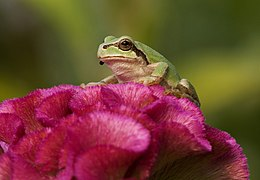

In [10]:
from PIL import Image
import requests

Image.open(requests.get(list_image_urls[0], stream=True).raw).convert('RGB')

### Create the index

In [4]:
from langchain.indexes import VectorstoreIndexCreator
index = VectorstoreIndexCreator().from_loaders([loader])

/Users/saitosean/dev/langchain/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/saitosean/dev/langchain/.venv/lib/python3.10/site-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Using embedded DuckDB without persistence: data will be transient


### Query

In [8]:
query = "What's the painting about?"
index.query(query)

' The painting is about a battle scene.'

In [9]:
query = "What kind of images are there?"
index.query(query)

' There are images of a spiral galaxy, a painting of a battle scene, a flower in the dark, and a frog on a flower.'